In [51]:
import sys
sys.path.append('/home/keeganfl/Desktop/Work_Fall_2021/Fall_2021_Work_journal/tools/')

In [52]:
# import plastid
# data structure for mapping read alignments to genomic positions
from plastid import BAMGenomeArray, VariableFivePrimeMapFactory, \
                        GTF2_TranscriptAssembler, GFF3_TranscriptAssembler, \
                        Transcript, ThreePrimeMapFactory
import numpy as np
import os
from Bio import SeqIO
import numpy
import math
import pandas as pd
from scipy import stats
import keegan_analysis_tools as kat
from statsmodels.nonparametric.smoothers_lowess import lowess
import warnings
import matplotlib.pyplot as plt
%matplotlib inline
import csv
from scipy.sparse.linalg import lsqr

In [53]:
# Define the variables for the notebook
data_path = '/home/keeganfl/Desktop/Work_Fall_2021/genomes_&_samples/dmel/'
te_table_path = '/home/keeganfl/Desktop/Work_Fall_2021/data_tables/TE_tables/dmel/'
ribo_count_path = '/home/keeganfl/Desktop/Work_Fall_2021/'
gtf_name = 'Drosophila_melanogaster.BDGP6.32.103.gtf'
mutation = "Fmr1"
samp_num = "2"

In [90]:
te_table = pd.read_csv(te_table_path + "control_2_te_table.csv")

In [91]:
ribo_count = pd.read_csv(ribo_count_path + "ribosomes_per_gene.csv")

In [92]:
df = pd.merge(ribo_count, te_table, how = "inner", right_on = "gene_ID", left_on = "Gene")

In [93]:
cols = ["Gene", "# ribosomes","TE_tpm","TE_rpkm", "RNA-seq_lengths"]
df = df[cols]

In [94]:
df["ribo_density"] = df["# ribosomes"]/(df["RNA-seq_lengths"]/1000)

In [95]:
df = df[df["TE_rpkm"] <= 20]
df = df[df["TE_rpkm"] >= 0]

In [96]:
m,b=np.polyfit(df["TE_rpkm"], df["ribo_density"],1)

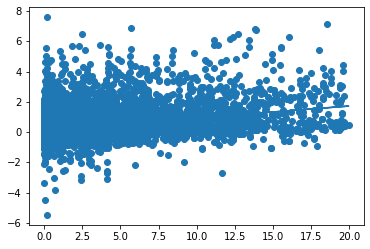

In [97]:
plt.scatter(df["TE_rpkm"], df["ribo_density"])
plt.plot(df["TE_rpkm"], m*df["TE_rpkm"] + b)

In [98]:
m

0.0783203477923495